<a href="https://colab.research.google.com/github/rbi-international/Parking-Birming-dataset-work/blob/master/parking_%2B_Birmingham_Class%2C_Regr%2C_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the parking+Birmingham dataset


In [4]:
'''First import the dataset and see the features in the dataset'''
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/rbi-international/Parking-Birming-dataset-work/master/dataset.csv')
print(df.head())

  SystemCodeNumber  Capacity  Occupancy          LastUpdated
0      BHMBCCMKT01       577         61  2016-10-04 07:59:42
1      BHMBCCMKT01       577         64  2016-10-04 08:25:42
2      BHMBCCMKT01       577         80  2016-10-04 08:59:42
3      BHMBCCMKT01       577        107  2016-10-04 09:32:46
4      BHMBCCMKT01       577        150  2016-10-04 09:59:48


In [5]:
print(df.tail())

      SystemCodeNumber  Capacity  Occupancy          LastUpdated
35712         Shopping      1920       1517  2016-12-19 14:30:33
35713         Shopping      1920       1487  2016-12-19 15:03:34
35714         Shopping      1920       1432  2016-12-19 15:29:33
35715         Shopping      1920       1321  2016-12-19 16:03:35
35716         Shopping      1920       1180  2016-12-19 16:30:35


In [6]:
# No. of rows as Features
print(df.shape[0])

35717


In [7]:
# No. of columns as samples
print(df.shape[1])


4


In [8]:
df.isnull().sum()

SystemCodeNumber    0
Capacity            0
Occupancy           0
LastUpdated         0
dtype: int64

In [9]:
# Dividing data into input and target
#splitting the dataset into the source variables (independant variables) and the target variable (dependant variable)
target=df['LastUpdated']
target.shape

(35717,)

In [10]:
cols = df.columns
print(cols)

Index(['SystemCodeNumber', 'Capacity', 'Occupancy', 'LastUpdated'], dtype='object')


In [11]:
cols = df.columns[:3]
cols

Index(['SystemCodeNumber', 'Capacity', 'Occupancy'], dtype='object')

In [0]:
input_ = df[cols]

In [13]:
input_.shape

(35717, 3)

In [14]:
cols1 = df.columns[3:]
cols1

Index(['LastUpdated'], dtype='object')

In [15]:
input_.describe()

,Capacity,Occupancy
count,35717.000000,35717.000000
mean,1397.550130,642.228911
std,1179.326833,656.955535
min,220.000000,-8.000000
25%,500.000000,210.000000
50%,849.000000,446.000000
75%,2009.000000,798.000000
max,4675.000000,4327.000000


In [16]:
input_.isnull().sum()

SystemCodeNumber    0
Capacity            0
Occupancy           0
dtype: int64

In [17]:
input_.nunique()

SystemCodeNumber      30
Capacity              30
Occupancy           3013
dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
y = le.fit_transform(input_['SystemCodeNumber'].values)


In [20]:
print(input_)

      SystemCodeNumber  Capacity  Occupancy
0          BHMBCCMKT01       577         61
1          BHMBCCMKT01       577         64
2          BHMBCCMKT01       577         80
3          BHMBCCMKT01       577        107
4          BHMBCCMKT01       577        150
...                ...       ...        ...
35712         Shopping      1920       1517
35713         Shopping      1920       1487
35714         Shopping      1920       1432
35715         Shopping      1920       1321
35716         Shopping      1920       1180

[35717 rows x 3 columns]


In [0]:
input_ = y [:, np.newaxis]

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_,target,test_size = 0.2, random_state = 0)
print(np.shape(input_))
print(np.shape(x_train))
print(np.shape(x_test))

(35717, 1)
(28573, 1)
(7144, 1)


In [23]:
print(y_test)
y_test.shape

20480    2016-10-23 09:26:51
32463    2016-11-12 16:00:24
24689    2016-11-11 11:00:18
1469     2016-10-12 14:34:04
18590    2016-11-24 14:57:51
                ...         
34951    2016-11-05 10:59:39
19387    2016-10-30 09:59:52
459      2016-10-31 12:26:06
19884    2016-11-29 16:28:34
18758    2016-12-07 08:46:21
Name: LastUpdated, Length: 7144, dtype: object


(7144,)

In [0]:
# Create a function for the models
def models(X_train, Y_train):
        
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
    # Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
     # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0, max_iter = 10000)
    log.fit(X_train, Y_train)
    
    
    # Print the models accuracy on the training data
   
    print('[1] Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[2] Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    print('[3] Logistic Regression Classifier Training Accuracy:', log.score(X_train, Y_train))
    return tree, forest, log

In [28]:
# Getting all the models
model = models(x_train, y_train)

[1] Decision Tree Classifier Training Accuracy: 0.0026598537080460573
[2] Random Forest Classifier Training Accuracy: 0.0024848633325167116
[3] Logistic Regression Classifier Training Accuracy: 0.0018548979806110664


Now Applying Clustering

In [29]:
'''Dataset contained 46 columns out of which only 2 numerical values'''
df1 = df.iloc[:,[1,2]]
print(df1)
'''Now apply the K-Means on the dataset'''
from sklearn.cluster import KMeans
km = KMeans()
y_km = km.fit_predict(df1)
print(y_km)

       Capacity  Occupancy
0           577         61
1           577         64
2           577         80
3           577        107
4           577        150
...         ...        ...
35712      1920       1517
35713      1920       1487
35714      1920       1432
35715      1920       1321
35716      1920       1180

[35717 rows x 2 columns]
[0 0 0 ... 6 6 6]


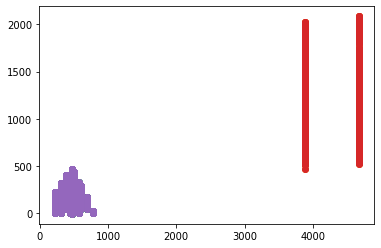

In [30]:
'''plotting the clusters. Dataset contain more number of zeros so in the graph
less instances are showing.'''
import matplotlib.pyplot as plt
plt.scatter(df1.iloc[y_km == 0,0], df1.iloc[y_km == 0,1])
plt.scatter(df1.iloc[y_km == 1,0], df1.iloc[y_km == 1,1])
plt.scatter(df1.iloc[y_km == 0,0], df1.iloc[y_km == 0,1])
plt.scatter(df1.iloc[y_km == 1,0], df1.iloc[y_km == 1,1])
plt.scatter(df1.iloc[y_km == 0,0], df1.iloc[y_km == 0,1])

plt.plot()
plt.show()

In [31]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='complete')
labels=ac.fit_predict(df1)
print('Cluster labels:%s'%labels)

Cluster labels:[1 1 1 ... 0 0 0]


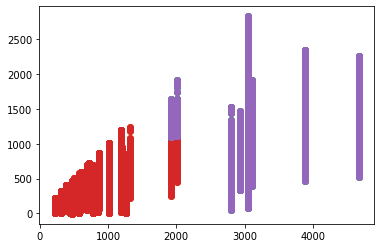

In [33]:
'''plotting the clusters. Dataset contain more number of zeros so in the graph
less instances are showing.'''
import matplotlib.pyplot as plt
plt.scatter(df1.iloc[labels == 0,0], df1.iloc[labels == 0,1])
plt.scatter(df1.iloc[labels == 1,0], df1.iloc[labels == 1,1])
plt.scatter(df1.iloc[labels == 0,0], df1.iloc[labels == 0,1])
plt.scatter(df1.iloc[labels == 1,0], df1.iloc[labels == 1,1])
plt.scatter(df1.iloc[labels == 0,0], df1.iloc[labels == 0,1])

plt.plot()
plt.show()

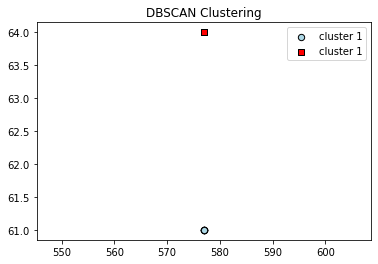

In [34]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db=db.fit_predict(df1)
plt.figure()
plt.scatter(df1.iloc[y_db==0,0],df1.iloc[y_db==0,1],c='lightblue',edgecolor='black', marker='o',s=40,label='cluster 1')
plt.scatter(df1.iloc[y_db==1,0],df1.iloc[y_db==1,1],c='red',edgecolor='black', marker='s',s=40,label='cluster 1')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

**Now** **Applying** **Regression** 

In [0]:
# Linear Regression
from sklearn.linear_model import LinearRegression

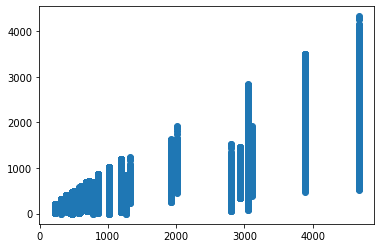

In [38]:
X = df[['Capacity']].values
Y = df[['Occupancy']].values
plt.scatter(X,Y)
plt.show()


In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30, random_state = 0)


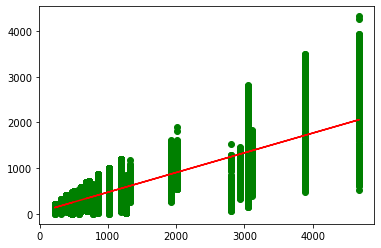

0.5965776075101522

In [40]:
slr = LinearRegression()
slr.fit(x_train,y_train)
y_predict = slr.predict(x_test)
plt.plot(x_test,y_predict, color = 'r')
plt.scatter(x_test,y_test,color ='g')
plt.show()
slr.score(x_test,y_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(slr.predict(x_train),y_train))
print(r2_score(slr.predict(x_train),y_train))

171027.2046001652
0.34482839984003766


# Decision Tree Regressor

In [0]:
from sklearn.tree import DecisionTreeRegressor
def lin_regplot(x,y,model):
    plt.scatter(x,y,c = 'steelblue', edgecolor = 'white', s = 70)
    plt.plot(x,model.predict(x), color = 'black', lw = 2)
    # return none

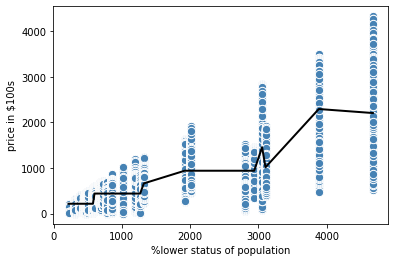

In [45]:
tree1 = DecisionTreeRegressor(max_depth = 3, random_state = 0)
tree1.fit(X,Y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], Y[sort_idx], tree1)
plt.xlabel('%lower status of population')
plt.ylabel('price in $100s')
plt.show()

In [48]:
print(mean_squared_error(tree1.predict(x_train),y_train))
print(r2_score(tree1.predict(x_train),y_train))

134633.28018746516
0.5497055540619435


# Random Forest Regressor

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


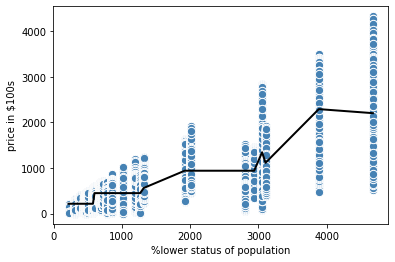

In [46]:
from sklearn.ensemble import RandomForestRegressor
tree2 = RandomForestRegressor(max_depth = 3, random_state = 0)
tree2.fit(X,Y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], Y[sort_idx], tree2)
plt.xlabel('%lower status of population')
plt.ylabel('price in $100s')
plt.show()

In [47]:
print(mean_squared_error(tree2.predict(x_train),y_train))
print(r2_score(tree2.predict(x_train),y_train))

135793.207572816
0.5394699653627621
